# MathorCup 2024 论文支撑材料
## YinMo19

In [1]:
# from mpl_toolkits import mplot3d
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.animation import FuncAnimation
import matplotlib.dates as mdates
import datetime

from scipy.integrate import odeint
from scipy import linalg as la
from scipy import optimize
import scipy
import csv

config = {
    "text.usetex": True,
    "text.latex.preamble": r"\usepackage{CJK}",  # 预先导入CJK宏包处理中文
}
plt.rcParams.update(config)

## 读入数据

In [34]:
data = []
with open("../../附件/附件1.csv", "r", encoding="gb2312") as file:
    csv_reader = csv.reader(file)
    for row in csv_reader:
        data.append(row)
        
head = data[0]

In [3]:
ALL_SC = list(set(list(np.array(data)[1:,0])))
data = np.array(data)

将数据分开

In [39]:
datas = np.array(
    [[data__[2] for data__ in data[1:] if data__[0] == SC_] for SC_ in ALL_SC],
    dtype="int64",
)

写入csv文件，分开储存

In [41]:
for SC_ in ALL_SC:
    with open(f"../SC_datas/{SC_}.csv", mode="w", newline="") as file:
        writer = csv.writer(file)
        writer.writerow(head)
        
        for row in data:
            if row[0] == SC_:
                writer.writerow(row)

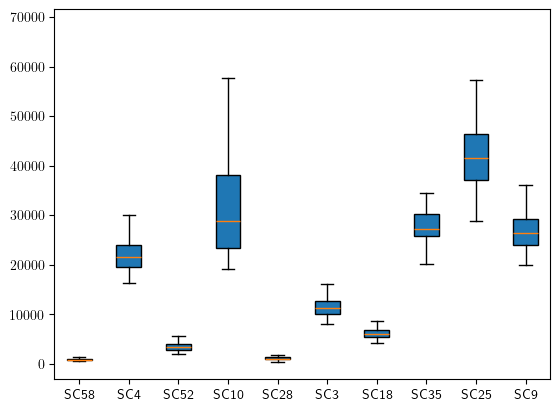

In [31]:
# 创建图表
plt.figure()
plt.boxplot(list(datas[0:10]), patch_artist=True, sym="None",labels=ALL_SC[0:10])

# 显示图表
plt.show()